In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
data = pd.read_csv("A_Z Handwritten Data.csv")


In [4]:
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
def check_unique_classes():
    unique_classes, class_counts = np.unique(data.iloc[:, 0].values, return_counts=True)
    print("Unique classes:", unique_classes)
    print("Class counts:", class_counts)
    return unique_classes, class_counts

In [6]:
unique_classes, class_counts = check_unique_classes()

Unique classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Class counts: [13869  8668 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586
 12336 19010 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272
 10859  6076]


In [7]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

In [8]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [9]:
y

array([ 0,  0,  0, ..., 25, 25, 25])

In [10]:
X = X / 255.0

In [11]:
def visualize_sample(index):
    image = X[index].reshape(28, 28)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {y[index]}")
    plt.show()

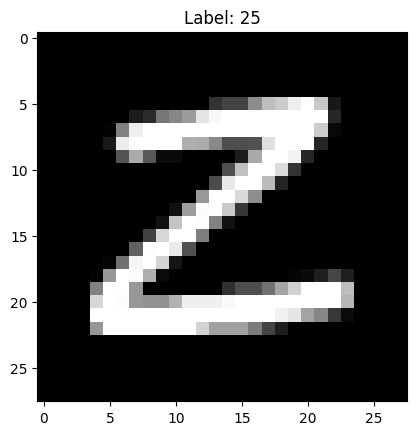

In [12]:
visualize_sample(370000)

In [19]:
# def limit_class_samples(data, label_column, n):
#   limited_data = data.groupby(label_column).apply(
#       lambda x: x.sample(n=min(len(x), n), random_state=42)).reset_index(drop=True)
#   return limited_data

In [44]:
# df = limit_class_samples(data, "0", 1000)

C:\Users\mahmo\AppData\Local\Temp\ipykernel_18248\4246819692.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  limited_data = data.groupby(label_column).apply(


In [45]:
def samples(data, label_column, n=1000):
    # Create an empty list to store the sampled data
    sampled_data = []

    # Iterate over each class in the label column
    for label in data[label_column].unique():
        # Select all samples from the current class
        class_data = data[data[label_column] == label]
        
        # If there are more than 'n' samples, randomly sample 'n' of them
        if len(class_data) > n:
            class_data = class_data.sample(n=n, random_state=42)
        
        # Append the selected class samples to the sampled_data list
        sampled_data.append(class_data)
    
    # Concatenate the sampled data into a single DataFrame
    return pd.concat(sampled_data).reset_index(drop=True)

In [46]:
df = samples(data, "0", 1000)

In [24]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [47]:
y

0         0
1         0
2         0
3         0
4         0
         ..
25995    25
25996    25
25997    25
25998    25
25999    25
Name: 0, Length: 26000, dtype: int64

In [48]:
x

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, shuffle=True,random_state=42)

In [28]:
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (20800, 784)
X_test shape: (5200, 784)
y_train shape: (20800,)
y_test shape: (5200,)


In [51]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

X_train shape: (20800, 784)
X_test shape: (5200, 784)
y_train shape: (20800,)
y_test shape: (5200,)


In [53]:
x_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392]])

In [54]:
x_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392],
       [ 0.        ,  0.        ,  0.        , ..., -0.00693392,
        -0.00693392, -0.00693392]])

In [55]:
svm_linear = SVC(kernel="linear")
svm_linear.fit(x_train, y_train)
y_pred_linear = svm_linear.predict(x_test)

In [56]:
print("SVM Linear Kernel:\n", classification_report(y_test, y_pred_linear))

SVM Linear Kernel:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       191
           1       0.80      0.88      0.84       182
           2       0.87      0.87      0.87       218
           3       0.80      0.83      0.82       219
           4       0.78      0.78      0.78       195
           5       0.90      0.96      0.93       191
           6       0.85      0.86      0.85       230
           7       0.77      0.80      0.79       192
           8       0.90      0.97      0.93       212
           9       0.85      0.81      0.83       214
          10       0.81      0.89      0.85       209
          11       0.91      0.96      0.94       213
          12       0.88      0.88      0.88       221
          13       0.78      0.78      0.78       187
          14       0.86      0.89      0.87       195
          15       0.89      0.93      0.91       194
          16       0.89      0.82      0.85       197
       

In [57]:
f1_linear_svm = f1_score(y_test, y_pred_linear, average='weighted')
print(f1_linear_svm)

0.8625407980554529


In [58]:
cm_linear = confusion_matrix(y_test, y_pred_linear)

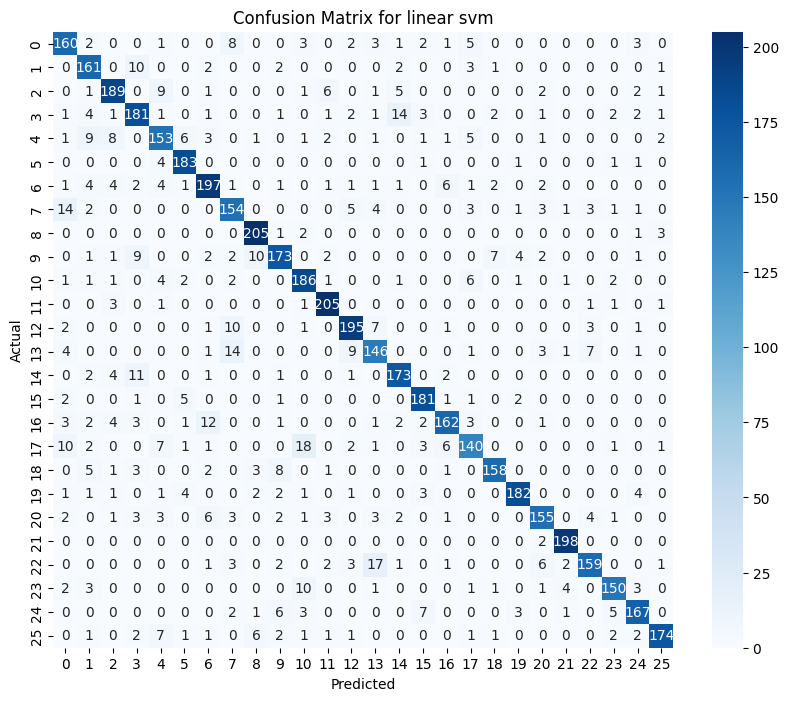

In [59]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for linear svm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [60]:
svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)

In [61]:
print("SVM Nonlinear Kernel:\n", classification_report(y_test, y_pred_rbf))

SVM Nonlinear Kernel:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88       191
           1       0.90      0.95      0.92       182
           2       0.93      0.93      0.93       218
           3       0.93      0.91      0.92       219
           4       0.90      0.86      0.88       195
           5       0.97      0.98      0.97       191
           6       0.95      0.90      0.92       230
           7       0.89      0.88      0.88       192
           8       0.97      0.96      0.97       212
           9       0.89      0.90      0.90       214
          10       0.90      0.91      0.90       209
          11       0.92      0.98      0.95       213
          12       0.94      0.93      0.93       221
          13       0.86      0.91      0.89       187
          14       0.93      0.96      0.94       195
          15       0.91      0.97      0.94       194
          16       0.92      0.91      0.92       197
    

In [62]:
f1_rbf_svm = f1_score(y_test, y_pred_rbf, average='weighted')
print(f1_rbf_svm)

0.9276681821019235


In [63]:
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

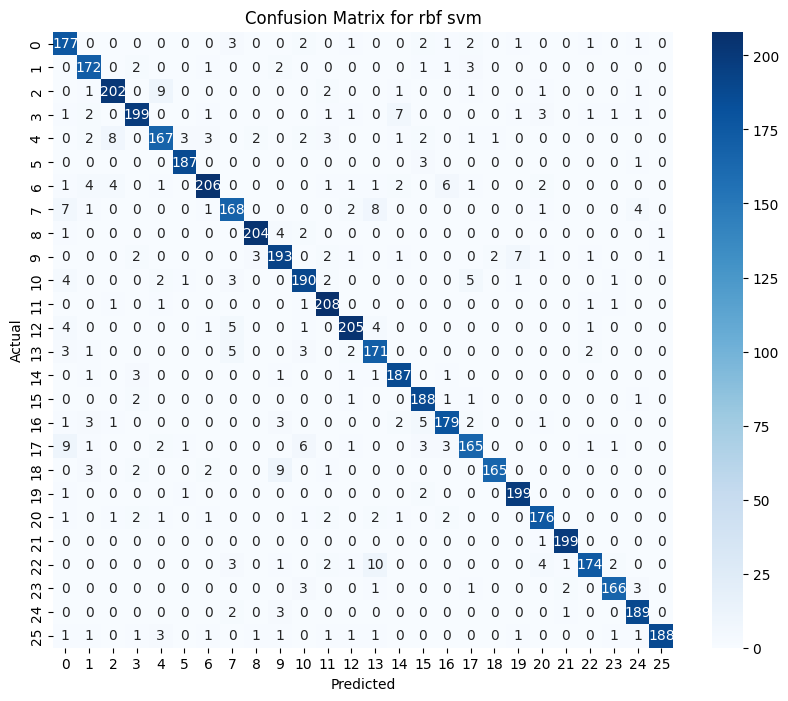

In [64]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for rbf svm')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()